importation des librairies et du dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

chargement des données

In [48]:
total_labels = pd.read_csv("/Users/mehdi/Downloads/archive (3)/labels.csv")
print(total_labels.shape)
total_labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [49]:
total_breeds = total_labels["breed"]
breed_count = total_breeds.value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [50]:
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = total_labels[(total_labels['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [51]:
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)


for i in tqdm(range(len(labels))):
    img = keras.utils.load_img('/Users/mehdi/Downloads/archive (3)/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = keras.utils.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    

print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|████████████████████████████████████████| 357/357 [00:01<00:00, 207.53it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [52]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       401536    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 128)     

In [53]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [54]:
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 13s 6s/step - loss: 7.4471 - accuracy: 0.3516 - val_loss: 7.3247 - val_accuracy: 0.4769
Epoch 2/100
2/2 [==============================] - 11s 6s/step - loss: 7.2942 - accuracy: 0.4492 - val_loss: 7.1773 - val_accuracy: 0.6308
Epoch 3/100
2/2 [==============================] - 11s 6s/step - loss: 7.1476 - accuracy: 0.4219 - val_loss: 7.0166 - val_accuracy: 0.4308
Epoch 4/100
2/2 [==============================] - 11s 6s/step - loss: 6.9973 - accuracy: 0.4375 - val_loss: 6.8757 - val_accuracy: 0.6615
Epoch 5/100
2/2 [==============================] - 11s 6s/step - loss: 6.8405 - accuracy: 0.6719 - val_loss: 6.7172 - val_accuracy: 0.6615
Epoch 6/100
2/2 [==============================] - 11s 6s/step - loss: 6.6898 - accuracy: 0.5781 - val_loss: 6.5594 - val_accuracy: 0.6615
Epoch 7/100
2/2 [==============================] - 11s 6s/step - loss: 6.5258 - accuracy: 0.6602 - val_loss: 6.4075 - val_accuracy: 0.6769
Epoch 8/100
2/2 [==========

2/2 [==============================] - 47s 42s/step - loss: 3.1917 - accuracy: 0.9648 - val_loss: 3.7178 - val_accuracy: 0.7692
Epoch 60/100
2/2 [==============================] - 234s 117s/step - loss: 3.1648 - accuracy: 0.9688 - val_loss: 3.6814 - val_accuracy: 0.7538
Epoch 61/100
2/2 [==============================] - 13s 7s/step - loss: 3.1396 - accuracy: 0.9844 - val_loss: 3.7512 - val_accuracy: 0.7538
Epoch 62/100
2/2 [==============================] - 111s 106s/step - loss: 3.1163 - accuracy: 0.9688 - val_loss: 3.6722 - val_accuracy: 0.7846
Epoch 63/100
2/2 [==============================] - 121s 114s/step - loss: 3.0872 - accuracy: 0.9844 - val_loss: 3.6812 - val_accuracy: 0.7692
Epoch 64/100
2/2 [==============================] - 51s 44s/step - loss: 3.0596 - accuracy: 0.9883 - val_loss: 3.6719 - val_accuracy: 0.7692
Epoch 65/100
2/2 [==============================] - 11s 6s/step - loss: 3.0378 - accuracy: 0.9883 - val_loss: 3.7013 - val_accuracy: 0.7692
Epoch 66/100
2/2 [====

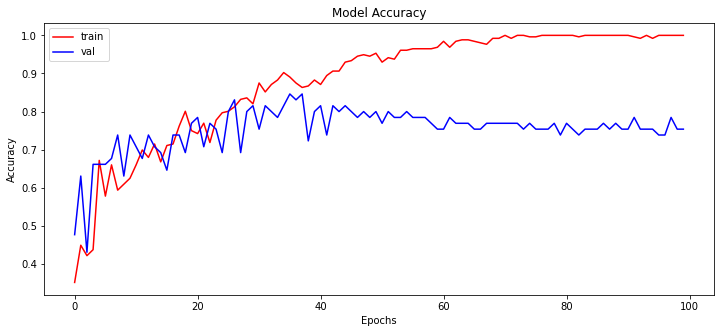

In [55]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

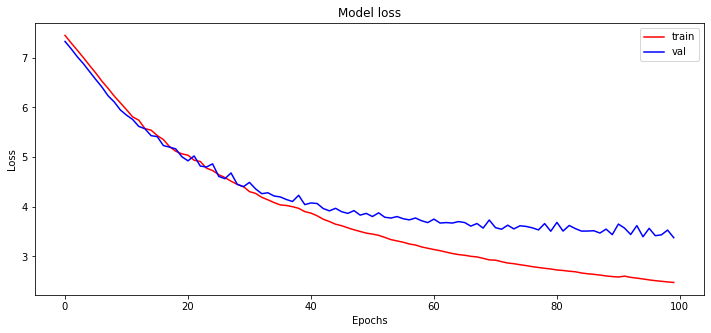

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [57]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 59ms/step - loss: 2.6876 - accuracy: 0.8889
Accuracy over the test set: 
  88.89 %


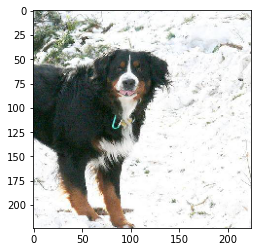

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [59]:
plt.imshow(X_test[20,:,:,:])
plt.show()

print("Originally : ",labels['breed'][np.argmax(Y_test[20])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[20])])